# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the datasets

In [3]:
#This dataset consists of about 40000 articles consisting of fake as well as real news.
#Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake.
#The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each.

true_data=pd.read_csv('True.csv')
fake_data=pd.read_csv('Fake.csv')

# Checking the data

In [4]:
true_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
title      23481 non-null object
text       23481 non-null object
subject    23481 non-null object
date       23481 non-null object
dtypes: object(4)
memory usage: 733.9+ KB


# Description of data

In [6]:
true_data.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [7]:
fake_data.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


# Viewing the data

In [10]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Assigning category- Fake/True

In [3]:
# 1 for true news and 0 for fake news
true_data['fake/true']=1
fake_data['fake/true']=0

In [4]:
true_data.head()

,title,text,subject,date,fake/true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [6]:
fake_data.head()

,title,text,subject,date,fake/true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# Merging the two datasets

In [5]:
data2=pd.concat([true_data,fake_data])

In [5]:
data2.head()

,title,text,subject,date,fake/true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [138]:
data2.tail()

,title,text,subject,date,fake/true
23476,McPain: John McCain Furious That Iran Treated US Sailors Well,"21st Century Wire says As 21WIRE reported earlier this week, the unlikely mishap of two US Nav...",Middle-east,"January 16, 2016",0
23477,"JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users","21st Century Wire says It s a familiar theme. Whenever there is a dispute or a change of law, an...",Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria,Patrick Henningsen 21st Century WireRemember when the Obama Administration told the world how i...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America Finally Calls it Quits,21st Century Wire says Al Jazeera America will go down in history as one of the biggest failures...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military – Signs of a Neocon Political Stunt,"21st Century Wire says As 21WIRE predicted in its new year s look ahead, we have a new hostage ...",Middle-east,"January 12, 2016",0


# Exploring the data

In [82]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
title        44898 non-null object
text         44898 non-null object
subject      44898 non-null object
date         44898 non-null object
fake/true    44898 non-null int64
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [83]:
data2.describe()

,fake/true
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Checking the data visually

In [20]:
sns.set_style='whitegrid'

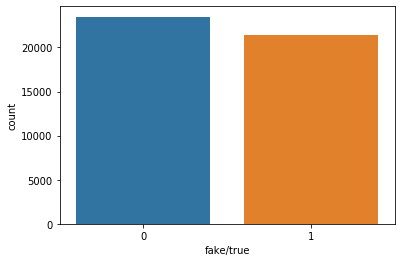

In [84]:
sns.countplot(data2['fake/true'])

In [22]:
# It is observed that the dataset is well balanced.


# Checking for null values

In [86]:
data2.isnull().sum()

title        0
text         0
subject      0
date         0
fake/true    0
dtype: int64

# Exploring the data further

In [87]:
data2['title'].count()

44898

In [88]:
data2['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

# Checking the topic wise count of fake and real news

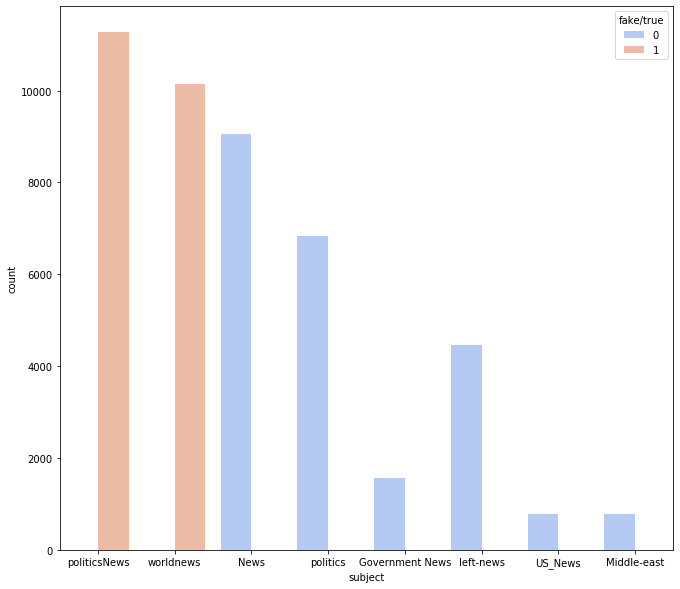

In [89]:
plt.figure(figsize=(11,10))
sns.countplot(x='subject',hue='fake/true',data=data2,palette='coolwarm')

# Finding most popular topic of fake news

In [90]:

df=data2[data2['fake/true']==0]

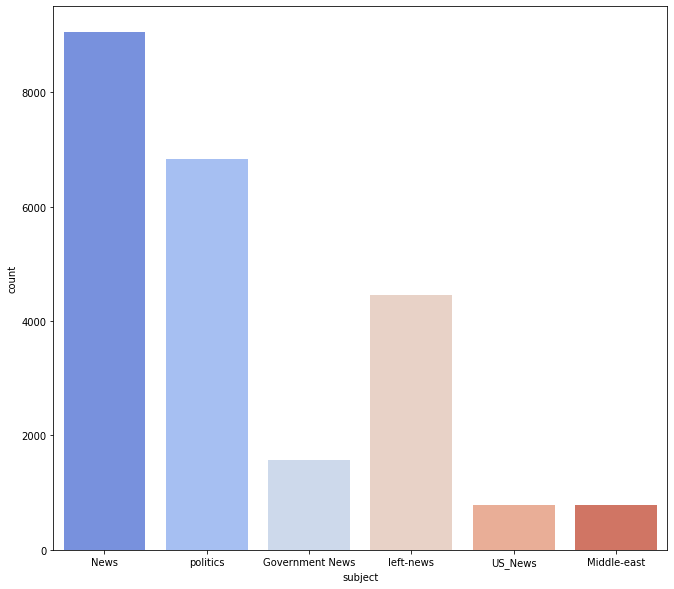

In [91]:
plt.figure(figsize=(11,10))
sns.countplot(x='subject',data=df,palette='coolwarm')

# Removing columns that are not significant

In [6]:
data2=data2.drop('date',axis=1)

In [7]:
data2.head()

,title,text,subject,fake/true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [12]:
data2=data2.drop('subject',axis=1)

# Concatenating title to text column, combining data

In [8]:
data2['text']=data2['title']+" "+data2['text']

In [9]:
#to view full text

pd.set_option('display.max_colwidth', -1)

data2['text'].head(1)

0    As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for

In [10]:
data2=data2.drop('title',axis=1)

# Final dataframe with just the merged text column

In [13]:
pd.set_option('display.max_colwidth', 100)

data2.head()

,text,fake/true
0,"As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head...",1
1,U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgen...,1
2,Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special ...,1
3,FBI Russia probe helped by Australian diplomat tip-off: NYT WASHINGTON (Reuters) - Trump campaig...,1
4,Trump wants Postal Service to charge 'much more' for Amazon shipments SEATTLE/WASHINGTON (Reuter...,1


# Data cleaning

# Removing stopwords and punctuations

In [14]:
from nltk.corpus import stopwords
import string

In [15]:
def text_process(mess):
    """
    1. remove punc
    2.remove stop words
    3. return list of clean text words
    """
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    text=[word for word in nopunc.split() if word.lower() not in stopwords.words('English')]
    return text

# Converting all text to lower Case

In [16]:
#ignore comments

# def lower_text(text):
#     text=[i.lower() for i in text.split()]
#     return text


# Removing the text in square brackets

In [17]:

# import re
# def remove_between_squarebrackets(text):
#     return re.sub('\[[^]]*\]+', '', text)

# Removing numbers in text

In [18]:
# def remove_numbers(text):
#     text = ''.join([i for i in text if not i.isdigit()])         
#     return text

# Removing url in text

In [19]:
# def remove_url(text):
#     return re.sub(r'http\S+', '', text)

In [20]:
# from nltk.stem import PorterStemmer
# st = PorterStemmer()
# def stemm(text):
#     text=" ".join([st.stem(word) for word in text.split()])
#     return text

# Importing nltk and downloading wordnet

In [22]:
# import nltk
# nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


# Lemmatization

In [23]:
# from nltk.stem import WordNetLemmatizer 
  
# lemmatizer = WordNetLemmatizer() 
# def lemmat(text):
#     text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
#     return text

# Combining all data cleaning functions

In [16]:
def clean_text(text):
#     text=remove_between_squarebrackets(text)
#     text=remove_url(text)
#     text=remove_numbers(text)
    text=text_process(text)
    #text=lemmat(text)
#     text=lower_text(text)
    return text

# Applying data cleaning function on the whole dataset

In [17]:
#ignore
# data2['text']=data2['text'].apply(clean_text)

In [42]:

data2.head()

text  \
0  As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative

# Splitting the data into training set and test set


In [17]:
from sklearn.model_selection import train_test_split
X=data2['text']
y=data2['fake/true']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

# Creating a pipeline to train the model

In [19]:
from sklearn.pipeline import Pipeline


# Importing necessary libraries

# 1. For count vectorization:

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


# 2. Using TF-IDF:

In [21]:
from sklearn.feature_extraction.text import TfidfTransformer

# 3. Using SVC:

In [22]:
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [23]:
pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',LinearSVC())
])

In [24]:
model=pipeline.fit(X_train,y_train)
predictions=model.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6996
           1       1.00      1.00      1.00      6474

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [27]:
print(confusion_matrix(y_test,predictions))

[[6976   20]
 [  11 6463]]


In [28]:
print("accuracy: {}%".format(round(accuracy_score(y_test, predictions)*100,2)))

accuracy: 99.77%


In [ ]:
# Using Multinomial Nb 96.7%

In [50]:
import pickle
saved_model = pickle.dumps(model) 

In [51]:
from_pickle = pickle.loads(saved_model) 

In [22]:
# RandomForestClassifier #96.56%

# Results

In [ ]:
'''1. With lemmatization:
split: 0.3, state 42-
    1.Random forest- 88.86%
    2.SVC- 83.75
    3.Decision tree- 83.68
    4. MultinomialNB- 55.4%

split: 0.25,state:42-
     1.Random forest- 89.11%
    2.SVC- 84.11
    3.Decision tree- 83.65
    4. MultinomialNB- 55.48%
split: 0.2,state:42-
     1.Random forest- 89.16%
    2.SVC- 84.08
    3.Decision tree- 83.72
    4. MultinomialNB- 55.16%   

    '''